In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [ ]:
df = pd.read_html('https://www.kaggle.com/') # web scrapping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath = ('/content/drive/MyDrive/practise/Academic Assignment (Responses) - Form Responses 1.csv')
df = pd.read_csv(filepath)

# Data Collecting



*   Made a google form for collecting data and collected age, height, weight and state for BMI prediction.

While collecting data, came across issues:

*  People filled in data in wrong units despite mentioning the units.
*  Welcome to data collection where you realise college graduates don't read.
*  Empty response, did not fill, very skewed data, extremely clustered in a specific age group due to limitations.

Solutions that can improve dataset:

*  Taking data from a variety of different sources.

In [ ]:
df.head()

,Timestamp,Sex,Age (in years),Weight in Kilograms(Kgs),Height in centimeters(cms),What state do you belong to?
0,6/15/2023 12:59:17,Male,28,60,162,NaN
1,6/15/2023 13:04:17,Female,27,80,163,NaN
2,6/15/2023 13:04:40,Male,23,110,175,NaN
3,6/15/2023 13:06:27,Male,23,85,180,NaN
4,6/15/2023 13:19:24,Female,21,46,164,NaN


In [ ]:
df.isnull().sum()

Timestamp                        0
Sex                              0
Age (in years)                   0
Weight in Kilograms(Kgs)         0
Height in centimeters(cms)       0
What state do you belong to?    19
dtype: int64

<ipython-input-6-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

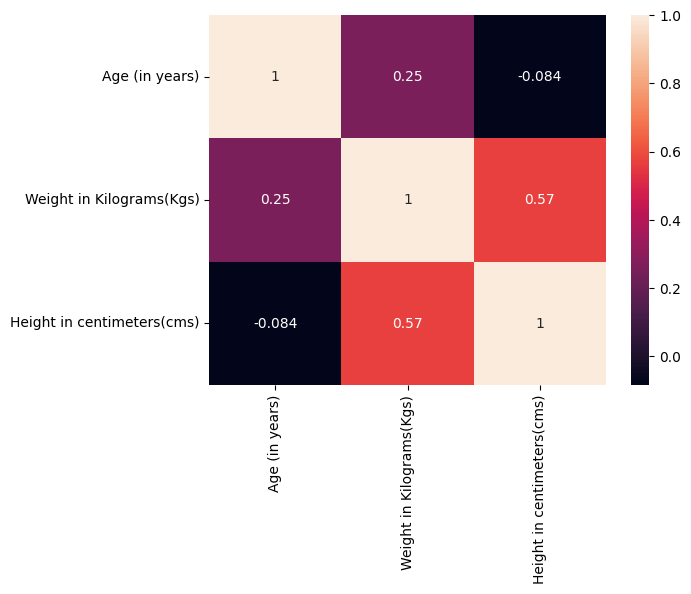

In [ ]:
sns.heatmap(df.corr(), annot = True)

<ipython-input-7-92fc1119be58>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age (in years)'])


<Axes: xlabel='Age (in years)', ylabel='Density'>

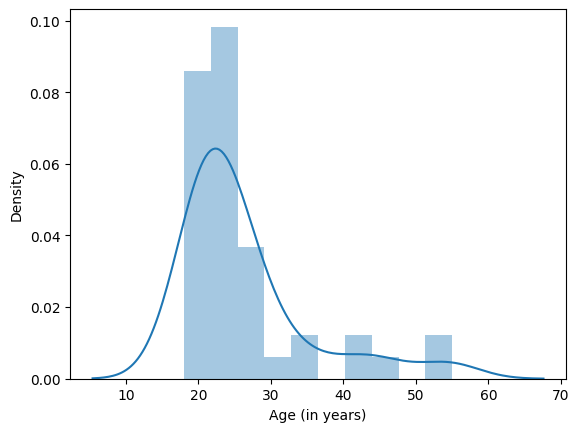

In [ ]:
sns.distplot(df['Age (in years)'])

In [ ]:
true_bmi = lambda row: row['Weight in Kilograms(Kgs)'] / ((row['Height in centimeters(cms)'] / 100) ** 2)

In [ ]:
df['BMI'] = df.apply(true_bmi, axis = 1)

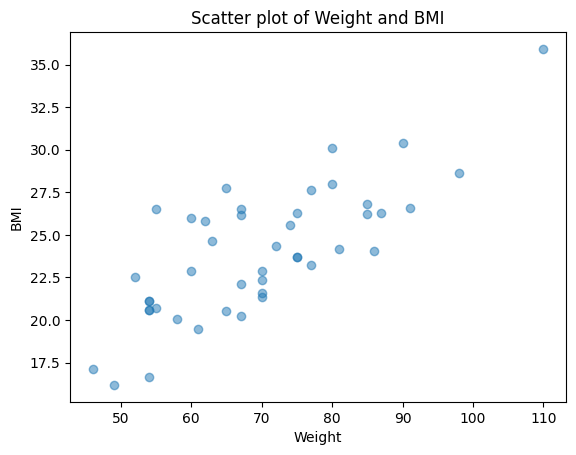

In [ ]:
plt.scatter(df['Weight in Kilograms(Kgs)'], df['BMI'], alpha=0.5)
plt.title('Scatter plot of Weight and BMI')
plt.xlabel('Weight')
plt.ylabel('BMI')
plt.show()

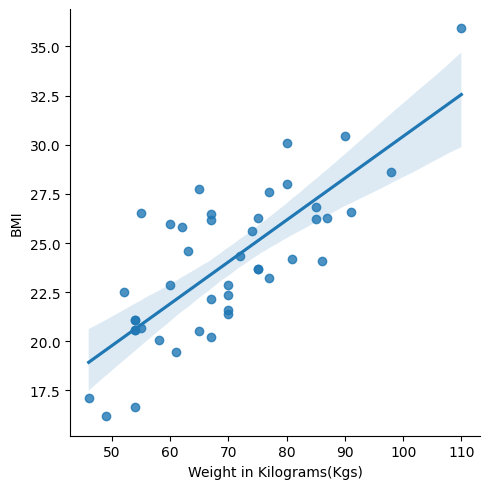

In [ ]:
sns.lmplot(data = df, x = 'Weight in Kilograms(Kgs)', y = 'BMI')

In [ ]:
df.tail()

,Timestamp,Sex,Age (in years),Weight in Kilograms(Kgs),Height in centimeters(cms),What state do you belong to?,BMI
39,6/16/2023 9:04:43,Male,27,70,175,Maharashtra,22.857143
40,6/16/2023 16:57:40,Female,18,49,174,Tamil Nadu,16.184437
41,6/16/2023 18:01:37,Female,46,65,153,Karnataka,27.767098
42,6/16/2023 20:13:15,Male,25,81,183,HP,24.187046
43,6/16/2023 21:11:41,Male,29,67,160,International,26.171875


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
model = LinearRegression()

In [ ]:
X_train = df[['Weight in Kilograms(Kgs)', 'Height in centimeters(cms)']]
y_train = df['BMI']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0)

In [ ]:
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [ ]:
pred[:10]

array([29.5034584 , 23.66283451, 16.01196102, 17.7278829 , 24.34223403,
       20.98452992, 21.04629352, 24.57919437, 26.20751788, 22.06371046])

In [ ]:
r2 = model.score(X_test, y_test)
print(r2)

0.9921843121965845
